# II. EDA

### Goals

### Comments

In [1]:
import json
import numpy as np
import pandas as pd

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth', 800)
from ast import literal_eval
import nltk

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_path = './Data'

In [3]:
df_new = pd.read_csv(data_path+'/jacobs_corpus.csv')
df_new.columns

Index(['sentence', 'label', 'datatype', 'title', 'publication_date', 'file_id', '-1', 'Profit', 'Dividend', 'MergerAcquisition', 'SalesVolume', 'BuyRating', 'QuarterlyResults', 'TargetPrice', 'ShareRepurchase', 'Turnover', 'Debt'], dtype='object')

## I. Check Text Properties

In [4]:
multi_labels = ['-1',
       'Profit', 'Dividend', 'MergerAcquisition', 'SalesVolume', 'BuyRating',
       'QuarterlyResults', 'TargetPrice', 'ShareRepurchase', 'Turnover',
       'Debt']

In [5]:
df_new.head(2)

,sentence,label,datatype,title,publication_date,file_id,-1,Profit,Dividend,MergerAcquisition,SalesVolume,BuyRating,QuarterlyResults,TargetPrice,ShareRepurchase,Turnover,Debt
0,"It will not say what it has spent on the project , but it is unlikely to be a large share of the annual pound(s)3bn capex bill .",-1,holdin,tesco,25-09-2013,833,1,0,0,0,0,0,0,0,0,0,0
1,"Sir John Bond , chairman , told the bank 's annual meeting that recent rises in interest rates and a slowing housing market were affecting consumer confidence and the level of bad debts .",-1,holdin,FT other HSBC,28-05-2005,393,1,0,0,0,0,0,0,0,0,0,0


### Inspect Individual Sentences

In [6]:
inspect_fields=['sentence','title']

#### Profit

In [7]:
df_new[df_new['Profit']==1][inspect_fields].sample(10,random_state=42)

,sentence,title
9783,"The euro could survive an exit by Greece , HSBC predicted yesterday , as it announced that first-quarter underlying profit had risen 25 per cent year on year to $ 6.78bn .",FT other HSBC
3703,"Vodafone is expected to say next week that its core profit margin will continue to fall in the current financial year , as the world 's largest mobile phone group by revenue fights fierce competition in its European markets .",vodafone's margins set to fall
3654,Chemical makers and industrial companies were under pressure after profit warnings from 3M and Du Pont .,bhp suffers in falling market as analysts criticise investment plans
7358,"Though brutal weather in June and July scared off shoppers , Sir Terry Leahy , Tesco 's chief executive , was resolutely upbeat about the future as the retailer reported underlying first-half trading profits of Pounds 1.2bn , a 10 per cent rise year on year .",tesco's overseas bet
911,""" There was a lot of promotional couponing going on around Christmas , "" Mr Clarke said when the profit warning was announced last Thursday .",tesco starts sales fightback with new voucher campaign
6628,""" Our financial performance fell short of where we wanted it to be , "" said Stuart Chambers , chairman of Tesco 's remuneration committee , after pre-tax profit halved following a series of one-off charges .",two tesco directors paid pound(s)3m at exit
3589,"Earnings per share jumped 14 per cent from 12.93p to 14.72p , and the interim dividend is lifted 12.3 per cent to 4.37p.",tesco maintains appetite for us despite setback
1733,BHP last year reported net profits up by more than a quarter to $13.4bn.,bhp set to report further growth
4722,"Vodafone reported revenue of Pounds 31.1bn for 2006-07 , up 4.3 per cent on an organic basis , and adjusted operating profit of Pounds 9.5bn , up 4.2 per cent .",vodafone eyes selective deals
3859,BHP Billiton climbed 0.8 per cent to 962p on record first-half profits and news of a Dollars 2bn share buyback .,barclays shares knocked back on fears it may hit acquisition trail london


#### Divident

In [8]:
df_new[df_new['Dividend']==1][inspect_fields].sample(10,random_state=42)

,sentence,title
913,Pre-tax profit increased 9.5 per cent to pound(s)9.5bn and the total dividend rose 7.1 per cent to 8.9p after a final of 6.05p ( 5.65p ) .,vodafone eyes new round of acquisitions
2286,"Add that to the valuation discount and a dividend yield that , at 5.1 per cent , will attract income investors , and British Land looks the more attractive of the two .",british land
8275,"Verizon Communications has blocked dividend payments by Verizon Wireless since 2005 , in a move widely seen as an attempt to squeeze Vodafone out .",vodafone seeks to bolster empire via strategic sales
5383,"Seven years after Vodafone last received a dividend from Verizon Wireless , the leading US mobile phone operator , the UK telecoms group will get a new pay-out in 2012 .",the waiting game pays off for vodafone
7627,"Altogether , the telecoms group is handing shareholders just over pound(s)54bn - almost three-quarters of the net proceeds from the sale of its 45 per cent stake in Verizon Wireless .",vodafone's special payout poised to bolster dividend payments in uk to record pound(s)100bn
754,BHP increased its final dividend by28 per cent .,bhp billiton
1412,"BHP , which has 29 projects worth Dollars 17.5bn in construction or at the feasibility stage , increased its first-half dividend 14 per cent to 20 cents .",goodyear to leave bhp billiton mining
4014,"Shares in Barclays , the UK 's second-largest bank by market capitalisation , fell 5 per cent yesterday in spite of healthy profits for the third quarter , an improved assessment of the outlook for loan losses and the reinstatement of its dividend after almost a year .",barcap spoiler at the barclays party
6207,"Growing from a low base , motor insurer Admiral utilised special dividends as an alternative means of returning spare cash to shareholders .",bhp buy-back portends slew of shares repurchases
5308,"The record payout will be boosted by the pound(s)16.6bn special dividend from Vodafone , the study points out .",vodafone's special payout poised to bolster dividend payments in uk to record pound(s)100bn


#### MergerAcquisition

In [9]:
df_new[df_new['MergerAcquisition']==1][inspect_fields].sample(10,random_state=42)

,sentence,title
8113,Unilever in EUR1.3bn deal for Sara Lee brands,unilever in eur1.3bn deal for sara lee brands
235,"The consensus underestimates Wood 's scale and potential to boost profit margins following its acquisition last year of sector peer PSN , the broker said .",british land builds on longest winning streak in nine months
3180,"Excluding Japan , where Tesco made a second acquisition earlier this year , international sales were "" broadly similar to the first half "" .",tesco shares climb on strong uk sales growth
7891,The EUR7.7bn takeover of Kabel Deutschland by Vodafone won shareholder approval when votes in favour of the deal passed a crucial 75 per cent hurdle last night .,kabel investors approve eur7.7bn vodafone takeover
4732,"Both sides have escalated their war of words in the weeks since Rio rejected BHP 's offer of 3.4 of its shares for each one of Rio 's , in a takeover worth Dollars 147bn .",bhp chief launches attack against rio
7167,"Having had a $39bn bid for Canada 's PotashCorp blocked in 2010 , BHP remains committed to building a world-scale potash business , Merrill said .",bhp billiton in the spotlight on talk of bid for mosaic
7742,Vodafone tried to reassure investors yesterday that it would benefit from plans for a merger between the UK mobile phone businesses of France Telecom and Deutsche Telekom .,vodafone reassures on merger of rivals
7651,"As well as taking a more cautious view of revenue growth and margin assumptions for Hikma 's existing businesses , UBS highlighted that Hikma 's recent acquisition of Morocco-based Promopharm was paid for by debt raised in Dubai so would not be eligible for a debt tax shield .",barclays counts cost of proposed icb banking sector reforms
256,GlaxoSmithKline slipped 0.8 per cent to pound(s)12.94 amid renewed speculation it was on the acquisition trail .,barclays leads the way down
1289,"Traders expect other offers to emerge for Enodis and are tipping Manitowoc , in Wisconsin , as a likely counter-bidder .",rises for vodafone and bt group are bright spots among steep losses london


#### SalesVolume

In [10]:
df_new[df_new['SalesVolume']==1][inspect_fields].sample(10,random_state=42)

,sentence,title
1785,"With the core UK business struggling ( like-for-like sales in the UK fell 1.2 per cent in the third quarter ) , the company is becoming increasingly frugal and picking its targets far more carefully .",tesco
5166,"Among the fallers , outsourcing group Xchanging dived 12.5 per cent to 175p on a warning that sales would miss expectations .",bhp helps power footsie recovery on talk of bp gulf bid
8977,"Tesco , which will update the market on Christmas trading next week , nowgenerates just over onefifth of its sales outside the UK , from 12 overseasmarkets across Europe and Asia .",tesco rules out big acquisition in us
1892,"Underlying growth including petrol rose 3.8 per cent in the 13 weeks to May 30 , while group sales rose 8.2 per cent in the same period .",falling food inflation takes a bite out of tesco sales growth
8306,"Sales in the US - where Tesco has been forced to slow its expansion plans - almost tripled , although Mr McIlwee acknowledged that the US operation was an "" immature and small business "" .",tesco aims to close growth gap
9741,"Last week Tesco reported its worst domestic sales performance for decades and issued its first profit warning in 20 years , after its "" Big Price Drop "" failed to revive sales over the Christmas and new year trading period .",tesco starts sales fightback with new voucher campaign
4304,"That was underpinned by sales of $605.6m , buoyed by the average price of gold and silver , which has risen by more than a quarter because of investor fears of sovereign debt risk .",fresnillo poised to overtake bhp in silver output
1488,"Internationally , sales growth of 1 per cent from stores open at least a year is underwhelming , given the amount of space added .",tesco
1985,"Even in the UK , where Tesco 's underlying sales growth of 3 per cent for the year is clearly lagging rivals Wm Morrison and Asda , Sir Terry still turned in a best-in-class trading margin of 6.2 per cent , helped by some crafty cost-cutting ( to the tune of pound(s)540m in the past financial year ) .",tesco chief cautious despite store's pound(s)3.1bn record profit
6307,J Sainsbury is also due to report its first-quarter sales on Wednesday .,tesco forecasts uk sales rebound


#### BuyRating

In [11]:
df_new[df_new['BuyRating']==1][inspect_fields].sample(10,random_state=42)

,sentence,title
458,"Paypoint retreated 6.2 per cent to 420p after Numis started coverage with "" sell "" advice and a 360p target .",barclays tumbles 10.5% after moody's cuts debt rating
5921,"Among small caps , Bowleven dropped 7.2 per cent to 80 1/4 p after Investec cut the Africa-focused oil explorer off its "" buy "" list .",doubts over barclays capital help to break banks' winning streak
631,"The broker also moved from "" underweight "" to "" neutral "" on Xstrata , up 6.4 per cent to 950p .",barclays' rebound amid volatility typical of trend
4981,"However , Vodafone bounced back to finish 1 per cent higher at 157.6p after Credit Suisse issued a""trading buy "" recommendation and said the company was the frontrunner to land the European iPhonecontract .",vodafone tipped as frontrunner to sell iphone in europe
6324,"ING , the Dutch financial services group , fell 11.9 per cent to EUR6.28 after Goldman Sachs cut its price target from EUR14 to EUR9 and kept its rating at "" neutral "" .",basf woes drag on chemicals
2736,"Fashion retailer SuperGroup lost 2.6 per cent to 695p after Shore Capital started coverage with a "" sell "" rating .",barclays and rbs take lead amid hopes that worst is factored in
5074,""" We would expect Rexam to clarify the use of proceeds upon announcing the transaction , "" said Merrill Lynch , which repeated "" buy "" advice .",tesco pushed to three-year low after customers shop elsewhere
3961,"They were most bearish on Telecom Italia , TeliaSonera and France Telecom , cutting UBS ratings on all three companies ' stock to "" sell "" .",vodafone sheds gain after bid talk denied
1635,"RBS and Canaccord Genuity repeated "" buy "" advice on the stock with both brokers arguing that fears about increased competition were already in the price .",british land and hammerson gains mirror wider rally
1113,"But house broker JPMorgan Cazenove argued that African Barrick still did not merit a "" buy "" , given weak operational results during the takeover period and a more conservative production outlook .",lloyds and barclays to the fore in best ftse finish since may 2008


#### QuarterlyResults

In [12]:
df_new[df_new['QuarterlyResults']==1][inspect_fields].sample(10,random_state=42)

,sentence,title
3436,"Tesco insisted it was narrowing the gap on faster-growing UK rivals Wm Morrison , J Sainsbury and Asda , as international sales buoyed its first-quarter performance .",tesco aims to close growth gap
1596,"P&G 's organic sales growth rose 8 per cent in the second quarter , beating its own forecast of 4 to 6 per cent , while Danone produced growth of 8.9 per cent .",unilever disappoints as margins decline
6820,It reported revenue growth of 9.2 per cent against the first quarter of 2006 .,sarin pledges to fight rebellion *embattled vodafone chief expects re-election *investors holding 10
9060,"Yesterday 's first-quarter numbers , showing operating profits up 40 per cent and product prices up 13 per cent , give the lie to that conservatism .",basf the
6589,"Although there were some unknowns , such as the impact of food price inflation , rising petrol prices and the hike in VAT , Mr McIlwee said : "" I feel we will have a good [ fourth quarter ] .",tesco sees confidence return with rise in sales
8608,"In bond trading , the investment bank 's engine , Barclays ' revenues dropped 8 per cent compared with the third quarter , while its largest global rivals on average lost 26 per cent .",evangelism belies change at barclays
2243,"I expect us to improve upon the third quarter like-for-like [ increase ] of 1.5 per cent , so it will be a good and improving performance in the UK and internationally . """,tesco sees confidence return with rise in sales
9792,"In the UK , like-for-like sales growth in the second quarter of 6.6 per cent year-on-year looks roughly in line , rather than ahead of competitors .",tesco
7350,"But like-for-like sales at Tesco 's core UK business accelerated 9.8 per cent in the third quarter , rising from 8.8 per cent in the second quarter and 7.8 per cent in the first three months .",tesco shares climb on strong uk sales growth
4664,"B&Q owner Kingfisher lost 1.8 per cent to 274.9p ahead of first-quarter results due Thursday , which were widely expected to disappoint because of inclement April weather .",tesco pushed to three-year low after customers shop elsewhere


#### TargetPrice

In [13]:
df_new[df_new['TargetPrice']==1][inspect_fields].sample(10,random_state=42)

,sentence,title
4017,Analysts lowered their target on the shares to SKr38 .,vodafone sheds gain after bid talk denied
2307,"Setting a downside target price of 75p , Citigroup drew attention to the dire consequences that proposed front-of-pack labelling could have on sales of pizzas , pies and formed meats - which generate about 10 per cent of group revenues at Northern Foods .",british land on solid ground with analyst optimism on reits rules london
5415,"Logica slid 5 per cent to 100 3/4 p after Petercam set an 82p target on the IT services group , which set out a restructuring plan in April .",vodafone resilient on renewed talk of verizon stake sale
6799,"Cattles , the consumer lending group , rose 5.2 per cent to 328 1/ 4p after Citigroup initiated coverage with a "" buy "" rating and a 385p target price .",barclays shares knocked back on fears it may hit acquisition trail london
177,Merrill Lynch has raised its target price on BG to Pounds 12 after lifting its long-term crude price forecast by Dollars 10 to Dollars 70 a barrel .,barclays and rbs left bruised
2463,"Premier Foods led the mid-cap gainers , up 6.4 per cent to 38 3/4 p , after Citigroup turned positive with a 40p price target .",vodafone misses footsie gains after analysts cut earnings expectations
3937,"Rexam was up 3.4 per cent to 303 1/4 p after Merrill Lynch restarted coverage with a "" buy "" rating and 380p target price for the packaging maker .",banks trail ftse amid concern over barclays cash call
6324,"ING , the Dutch financial services group , fell 11.9 per cent to EUR6.28 after Goldman Sachs cut its price target from EUR14 to EUR9 and kept its rating at "" neutral "" .",basf woes drag on chemicals
1212,"Asos , the online retailer , rose 4.6 per cent to pound(s)11.39 after Altium Securities started coverage with a "" buy "" recommendation and pound(s)12.26 price target based on international expansion prospects .",bhp move hits falkland oil
4527,"UBS , which downgraded Premier to "" sell "" with a 2p share price target , argued that creditors had moved in front of shareholders in the queue for cash flow .",barclays counts cost of proposed icb banking sector reforms


#### ShareRepurchase

In [14]:
df_new[df_new['ShareRepurchase']==1][inspect_fields].sample(10,random_state=42)

,sentence,title
9,"It has paid out part of the Verizon Wireless dividend stream previously , but with a stock buyback already under way that looks less certain this time .",verizonvodafone
816,A US regulator could delay the proposed Barclays ' Euros 3.6bn ( Dollars 4.9bn ) share buy-back unveiled yesterday as part of the UK bank 's revised offer for ABN Amro .,sec could delay barclays share buy-back
7105,BHP also unveiled a Dollars 3bn share buy-back and could afford more .,bhp billiton
5250,"Graham Secker , equity strategist at Morgan Stanley , said Vodafone 's share buyback , while unusual , may be well timed .",vodafone reveals plan for pound(s)1bn share buy-back
2733,Share buy-back news saw Debenhams rise 7.7 per cent to 67 1/2 p.,bhp slides on mosaic bid talk as ftse 100 drops to fortnight-low
9346,Vodafone to double dividend and increase share buyback,vodafone to double dividend and increase share buyback
5316,The company will return more than 60 per cent of that dividend to shareholders through a pound(s)1.5bn share buyback .,vodafone to write down pound(s)5.9bn over europe woes
7687,"No halt to the share buy-back programme ( on the contrary , the company says , this would be a good time to buy its own stock on the cheap ) , no let-up in demand from China and India , no problem in getting financing , should it be needed , for further expansion .",steady as bhp goes andrew hill - lombard
2723,"The share slide , which came in spite of a doubling of its dividend and a hefty share buy-back , was prompted by fears that increased competition in the UK and Japan could erode margins .",poor performance by vodafone sees footsie end winning streak london
5897,Vodafone has taken the unusual step of revealing a pound(s)1bn share buy-back in immediate response to the record sell-off of its stock after Tuesday 's revenue warning .,vodafone reveals plan for pound(s)1bn share buy-back


#### Turnover

In [15]:
df_new[df_new['Turnover']==1][inspect_fields].sample(10,random_state=42)

,sentence,title
1215,"With fixed income revenues of pound(s)1.46bn in the fourth quarter , the bank has now overtaken Deutsche Bank , one of its main rivals .",evangelism belies change at barclays
400,"Or take the unit 's equities revenue , up just 1 per cent .",barclaysdeutsche
4360,Stocks were unsettled by an initial fall on Wall Street after chipmaker Intel cut revenue forecasts .,vodafone sale talks drive up volumes london
5015,"That suggests BarCap is maintaining , even increasing , its share .",barclaysdeutsche
4839,Yet that makes BarCap and Morgan Stanley the only investment banks to report an increase so far .,barclaysdeutsche
7321,"Yet the investment bank 's fixed income , commodities and currencies unit has delivered a lacklustre performance in the first quarter .",barclays
9627,Vodafone reported a 6 per cent rise in underlying group turnover to Pounds 16.8bn for the six months to the end of September as it continued to add users to its global customer base .,vodafone to double dividend and increase share buyback
4084,A price war between Indian mobile operators means Vodafone reported lower revenue growth of 30 per cent in the third quarter .,rise in full-year guidance boosts vodafone shares
441,It blamed regulatory cuts to mobile termination rates - wholesale charges to rival providers for connecting calls - as well as the continued decline in voice revenues .,vodafone to reinvest verizon dividend
6457,"The story was different in the US where Verizon Wireless , the mobile operator 45 per cent owned by Vodafone , reported service revenues up 7.3 per cent year on year , contributing £ 4.9bn of profit to the British group .",FT other Vodafone 22-05-2012


#### Debt

In [16]:
df_new[df_new['Debt']==1][inspect_fields].sample(10,random_state=42)

,sentence,title
288,"Previously , the joint venture had appeared in the accounts as if it was 100 per cent owned but the new treatment meant Vodafone stopped recognising assets that effectively belonged to its partner , pushing net debt higher .",vodafone underlines impact
844,Vodafone will use an initial payment of pound(s)1.6bn by Softbank next month to reduce the UK group 's net debt .,vodafone steps up non-core asset sales with pound(s)3bn softbank disposal
5978,""" Now those wheels are back on and , if anything , Tesco is a little bit of a leaner , meaner machine , capable of going faster in terms of paying down debt and focusing on the business . """,tesco to grapple with plan to expand
6970,"The company 's broad earnings base allowed it to pay down net debt , which fell $2.3bn to $3.3bn.",diversity is linchpin of bhp's plan for potash
2338,"The other talking point will be Tesco 's net debt , which although still manageable is likely to exceed the group 's previous target of pound(s)8bn and could stunt short-term store growth .",tesco poised to make profits history
8240,"After a rights issue and asset sales in the second half , Rio is expected to halve net debt to about $19bn .",bhp and rio offer iron-clad earnings
5643,"At the end of its last quarter , KDG had net debt of EUR2.8bn , giving it an enterprise value of EUR8.4bn.",vodafone weighs bid for german cable group
7222,"PotashCorp , which has net debt of about $3.4bn , saw pre-tax profits in the first half of the year rise from $452m to $1.28bn.",bhp's potash bid puts m&a back on mining agenda
2275,BHP 's net debt stood at $7.9bn at the end of 2009 and its gearing ratio was 15 per cent .,bhp reaffirms iron ore link-up with rio
8753,"Among small caps , Namakwa Diamonds slumped 61.3 per cent to 10 1/2 p after warning that a $30m debt facility was no longer available on the original terms .",barclays stands out as banking sector gives footsie a leg up


In [17]:
df_new.columns

Index(['sentence', 'label', 'datatype', 'title', 'publication_date', 'file_id', '-1', 'Profit', 'Dividend', 'MergerAcquisition', 'SalesVolume', 'BuyRating', 'QuarterlyResults', 'TargetPrice', 'ShareRepurchase', 'Turnover', 'Debt'], dtype='object')

### Document Stats

Text(0, 0.5, '# of articles')

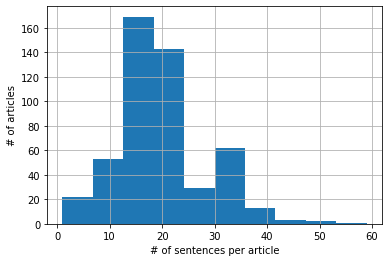

In [18]:
df_new.groupby('file_id')['label'].count().hist(); plt.xlabel('# of sentences per article'); plt.ylabel('# of articles')

In [19]:
sent_len = df_new['sentence'].dropna().apply(lambda x: len(nltk.word_tokenize(x)))

Text(0, 0.5, '# of sentences')

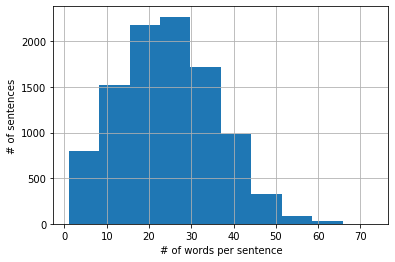

In [20]:
sent_len.hist(); plt.xlabel('# of words per sentence'); plt.ylabel('# of sentences')

* Observations:
    * Average sentence length is large, definitely most sentence are longer than titles
    * The average number of words according to internet 15-20 words. This distribution seems to show a slightler higher fraction
    

## II. Labels

In [21]:
df_new[multi_labels].apply(pd.Series.value_counts)

,-1,Profit,Dividend,MergerAcquisition,SalesVolume,BuyRating,QuarterlyResults,TargetPrice,ShareRepurchase,Turnover,Debt
0,2114,9286,9755,9684,9450,9710,9670,9843,9876,9697,9877
1,7823,651,182,253,487,227,267,94,61,240,60


* Observation
    * M&A has just 250 events. I have already more labeled with FActiva.

#### Distirbution of labels per document

In [22]:
multi_labels = ['-1',
       'Profit', 'Dividend', 'MergerAcquisition', 'SalesVolume', 'BuyRating',
       'QuarterlyResults', 'TargetPrice', 'ShareRepurchase', 'Turnover',
       'Debt']

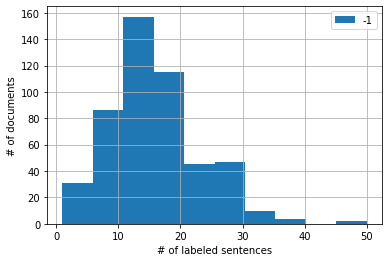

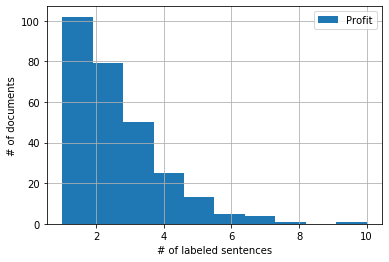

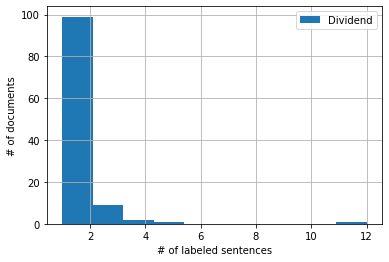

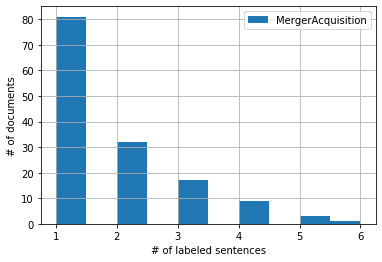

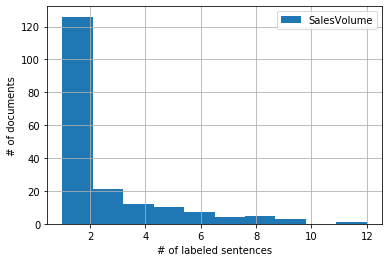

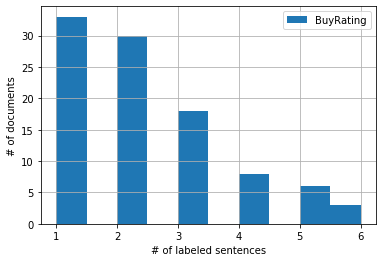

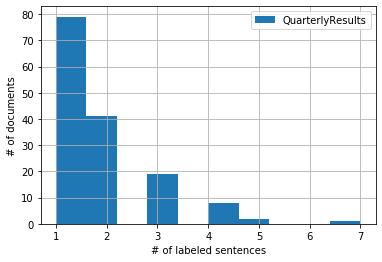

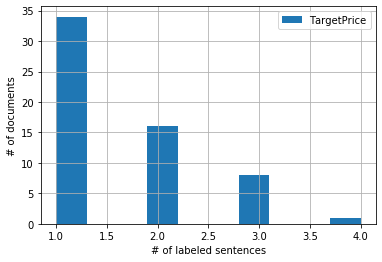

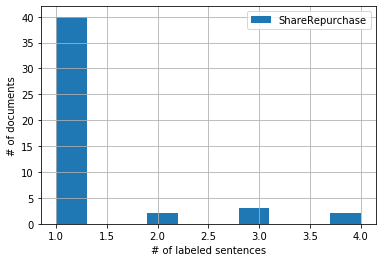

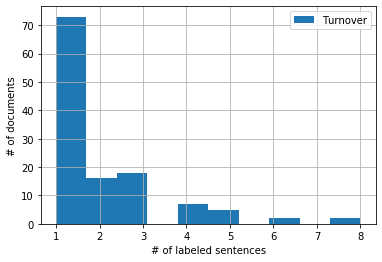

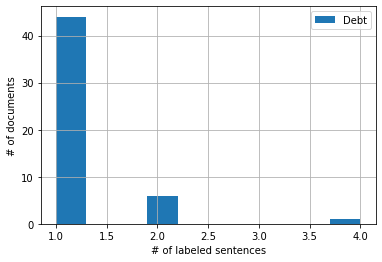

In [23]:
for label in multi_labels:
    plt.figure()
    df_new[df_new[label]==1].groupby('file_id')['label'].count().hist(label=label)
    plt.legend();plt.xlabel('# of labeled sentences');plt.ylabel('# of documents')

### III. Data Type: Training and Test sets

Differentiate training and hold-out set

In [24]:
df_new['datatype'].value_counts(())

holdin     8943
holdout     994
Name: datatype, dtype: int64

In [25]:
df_new[df_new['datatype']=='holdin'][multi_labels].apply(pd.Series.value_counts)

,-1,Profit,Dividend,MergerAcquisition,SalesVolume,BuyRating,QuarterlyResults,TargetPrice,ShareRepurchase,Turnover,Debt
0,1917,8350,8772,8715,8507,8738,8710,8853,8888,8729,8885
1,7026,593,171,228,436,205,233,90,55,214,58


In [26]:
df_new[df_new['datatype']=='holdout'][multi_labels].apply(pd.Series.value_counts)

,-1,Profit,Dividend,MergerAcquisition,SalesVolume,BuyRating,QuarterlyResults,TargetPrice,ShareRepurchase,Turnover,Debt
0,197,936,983,969,943,972,960,990,988,968,992
1,797,58,11,25,51,22,34,4,6,26,2


* Observation
    * Test set contains only 25 M&As!! Very few for evaluation; little compared to 228 training set
    * Target price, SharePurchase and Deb only contains <6 labels! Not worth considering

In [27]:
def index_to_time(df_new):
    def time_stamp(val):
        try:
            return pd.to_datetime(val)#,format='%d-%m-%Y')
        except:
            #try:
            #    return pd.to_datetdf_newime(val,format='%d-%m-%Y')
            #try: 
            print('error with ',val)
            return np.nan
    df_new['time'] = df_new['publication_date'].apply(time_stamp)
    #df_new['time_new'] = df_new["time"].apply( lambda df : datetime.datetime(year=df.year, month=df.month, day=df.day))	
    df_new.set_index(df_new["time"],inplace=True)
    return df_new

In [28]:
df_new = index_to_time(df_new)

error with  2
error with  2
error with  2
error with  2
error with  2
error with  2
error with  2
error with  2
error with  2
error with  2
error with  2
error with  2
error with  2
error with  2
error with  2
error with  2
error with  2
error with  2


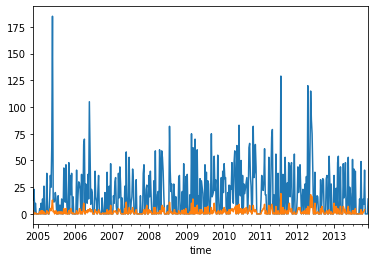

In [33]:
df_new[df_new['datatype']=='holdin']['datatype'].resample('7D').count().plot()
df_new[df_new['datatype']=='holdout']['datatype'].resample('7D').count().plot()

* Observation
    * Hold-in and hold-out sets are not separated in time. Likely positively biased results!
    * Time spans 2005 to 2013

### Time Variable

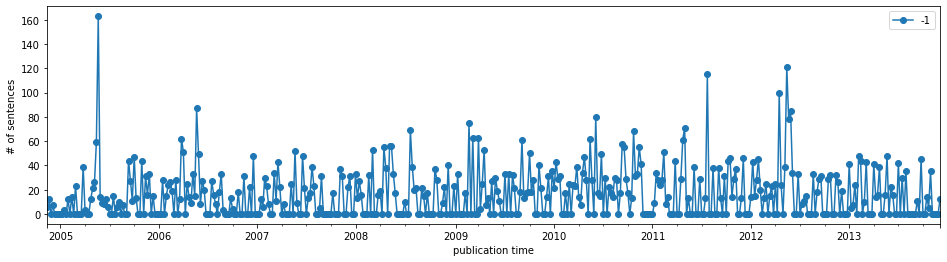

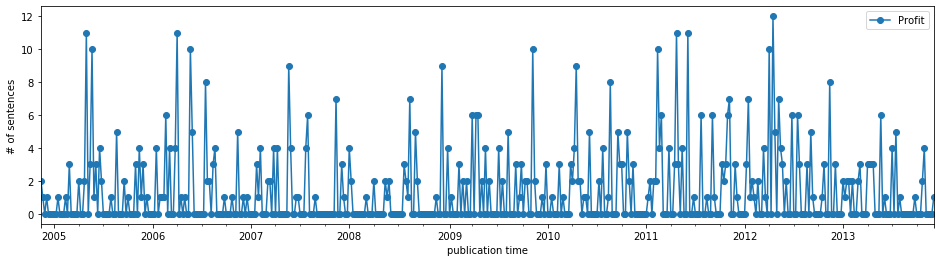

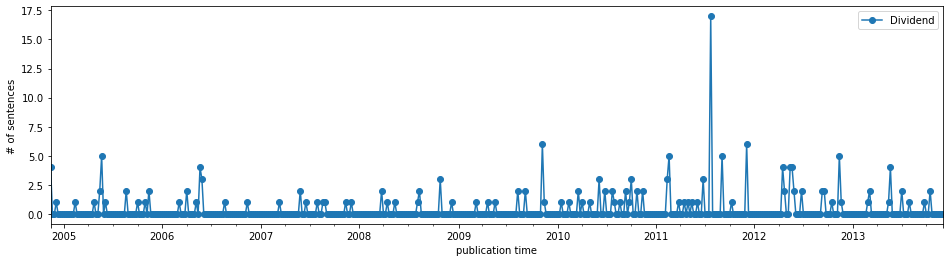

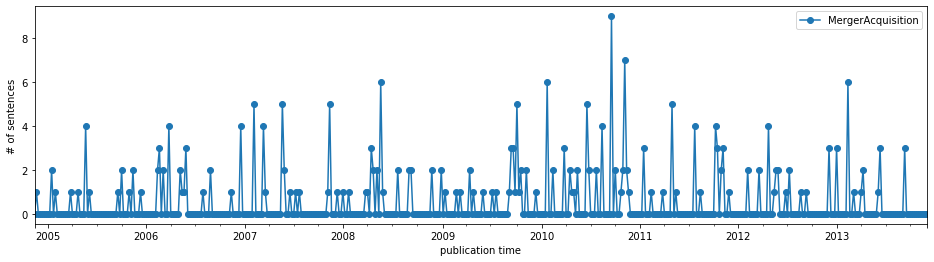

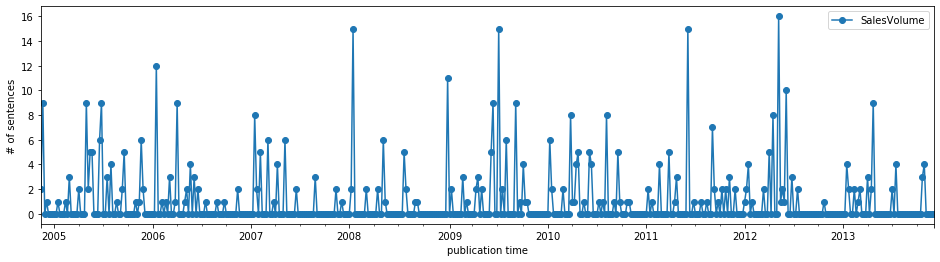

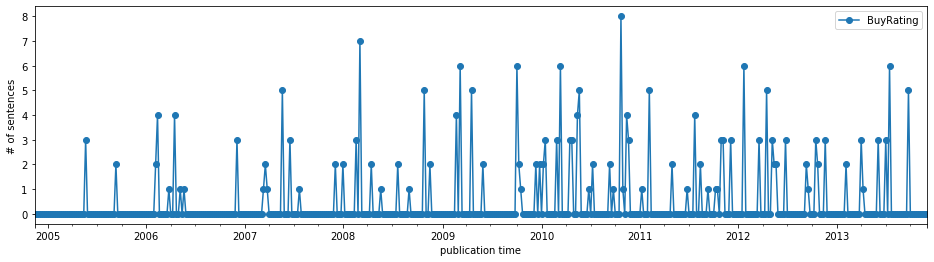

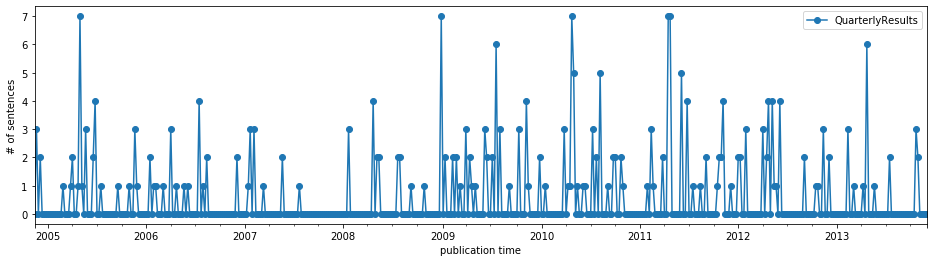

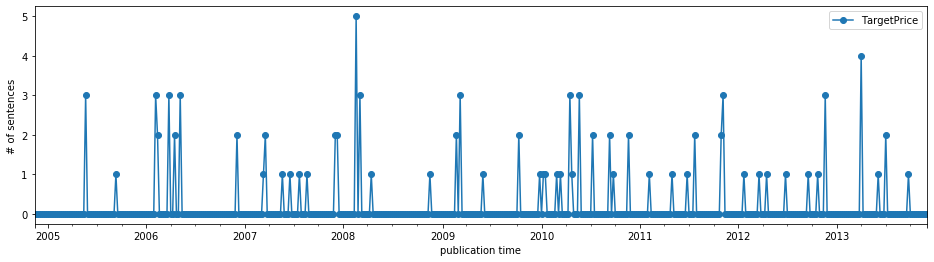

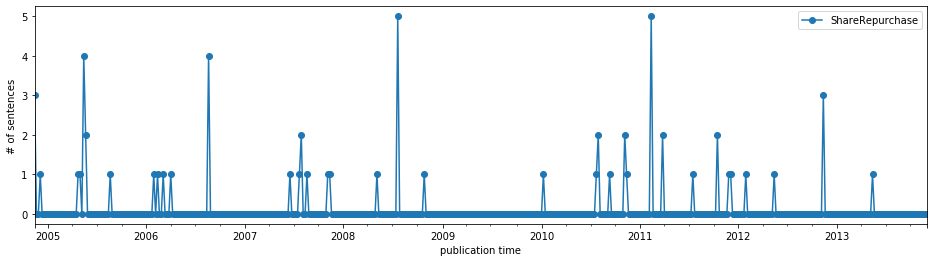

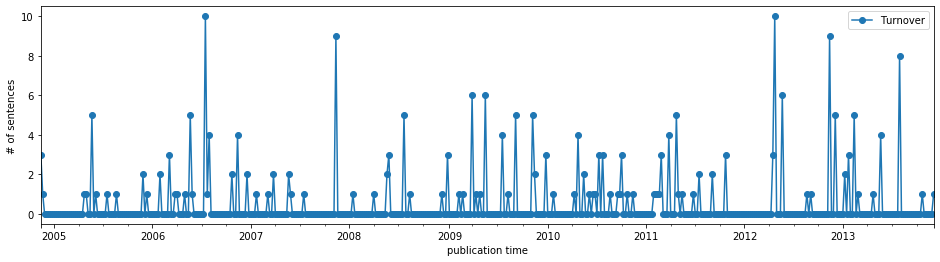

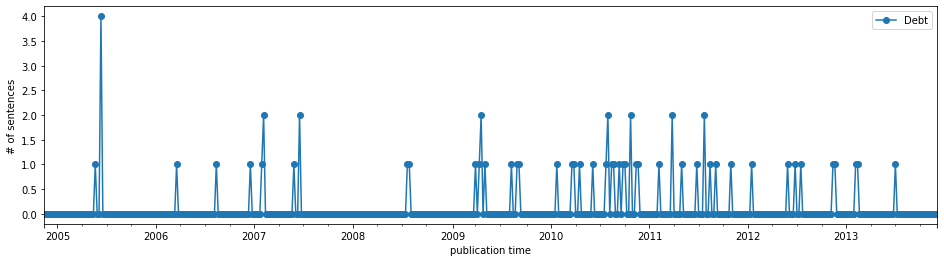

In [35]:
#fig=plt.figure(figsize=[16,4])
for label in multi_labels:
    plt.figure(label)
    df_new[label].resample('7D').sum().plot(marker='o',label=label,figsize=[16,4],sharex=False, sharey=False) #,sharex=True)
    plt.legend()
    plt.ylabel('# of sentences');plt.xlabel('publication time')

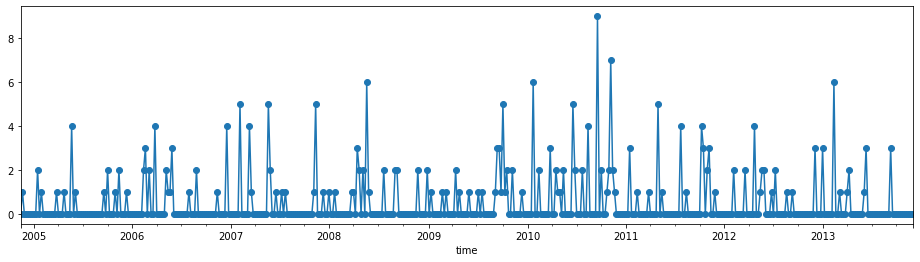

In [36]:
df_new['MergerAcquisition'].resample('7D').sum().plot(marker='o',label=label,figsize=[16,4],sharex=False, sharey=False) 

In [37]:
df_new.columns

Index(['sentence', 'label', 'datatype', 'title', 'publication_date', 'file_id', '-1', 'Profit', 'Dividend', 'MergerAcquisition', 'SalesVolume', 'BuyRating', 'QuarterlyResults', 'TargetPrice', 'ShareRepurchase', 'Turnover', 'Debt', 'time'], dtype='object')

## II. For full corpus body texts add labels as well

In [124]:
df_full_corpus_body = pd.read_csv('jacobs_corpus_body.csv')

In [125]:
df_full_corpus = pd.read_csv('jacobs_corpus.csv',converters={"label": literal_eval})

In [126]:
df_full_corpus.columns

Index(['label', 'sentences', 'title', 'publication_date', 'file_id', '-1', 'Profit', 'Dividend', 'MergerAcquisition', 'SalesVolume', 'BuyRating', 'QuarterlyResults', 'TargetPrice', 'ShareRepurchase', 'Turnover', 'Debt', '-1.1', 'time'], dtype='object')

In [127]:
labels = ['-1', 'Profit',]

In [128]:
df_full_corpus[['file_id','label']].head(10)

,file_id,label
0,569,-1
1,425,-1
2,765,-1
3,525,-1
4,181,-1
5,439,-1
6,473,-1
7,899,-1
8,827,-1
9,791,[ShareRepurchase]


In [129]:
df_full_corpus['label'].iloc[9]

['ShareRepurchase']

In [130]:
df_full_corpus_body.columns

Index(['date', 'file_id', 'text', 'title'], dtype='object')

In [131]:
def change_label(val):
    #print(type(val))
    if type(val) == list:
        return val
    else:
        return []
        #df_new['label'] = 
df_full_corpus['label'] = df_full_corpus['label'].apply(change_label)

In [132]:
df_full_corpus[['file_id','label']].head(10)

,file_id,label
0,569,[]
1,425,[]
2,765,[]
3,525,[]
4,181,[]
5,439,[]
6,473,[]
7,899,[]
8,827,[]
9,791,[ShareRepurchase]


In [133]:
df_new_subset = df_full_corpus[['file_id','label']].values

### Assign labels to documents

In [134]:
doc_ids = df_full_corpus_body['file_id'].values
labels=[]
for i,id1 in enumerate(doc_ids):
    labels1=[]
    for id2,label in df_new_subset:
        if id1 == id2:
            labels1+=label
            #print('found id')
    labels.append(labels1)

In [135]:
df_full_corpus_body['labels'] = labels

In [136]:
df_full_corpus_body.head(2)

,date,file_id,text,title,labels
0,22-11-2005,1,"Absa reports solid growth with Barclays in control Absa , the South African banking group , said its integration with new majority-owner Barclays was proceeding well as it announced a jump in its interim profit . The country 's biggest retail bank saw pre-tax profit for the six months ending September 30 rise from R3.33bn to R4.12bn ( Pounds 360m ) . Absa yesterday reported good growth across its business units , including retail , commercial , and wholesale and international banking . Steve Booysen , chief executive , said he expected the growth momentum to continue for the rest of the year . Barclays paid nearly R28bn ( Pounds 2.44bn ) for a controlling stake of Absa in July . The UK bank , which has committed to cap its stake at 60 per cent , owned 56.4 per cent of the bank at the e...",absa reports solid growth with barclays in control,"[MergerAcquisition, MergerAcquisition, SalesVolume, Dividend, Profit, Dividend, Profit]"
1,2-10-2013,3,"Aggreko falls to two-year low following Unilever warning Just two paragraphs long , Unilever ' s overnight profit warning may have been brief but its effects were wide , writes Bryce Elder . Aggreko dropped to a two-year low in reaction to Unilever 's warning that currency devaluations had held back emerging markets growth . Shares in the temporary power specialist dropped 3.9 per cent to pound(s)15.41. Short sellers have been targeting Aggreko on the argument that , since the company bills its emerging markets customers in dollars , local currency weakness was likely to be stalling investment decisions . About 10 per cent of Aggreko 's free float is loaned to short sellers in advance of a trading update from the group due at the end of the month . Unilever itself dropped 3.4 per cent ...",aggreko falls to two-year low following unilever warning,"[BuyRating, Profit, BuyRating, Profit]"


In [137]:
df_full_corpus_body['labels'].head(10)

0    [MergerAcquisition, MergerAcquisition, SalesVolume, Dividend, Profit, Dividend, Profit]
1                                                     [BuyRating, Profit, BuyRating, Profit]
2                                                            [SalesVolume, QuarterlyResults]
3                                                                                   [Profit]
4                   [BuyRating, TargetPrice, BuyRating, TargetPrice, TargetPrice, BuyRating]
5                                        [Profit, Profit, BuyRating, TargetPrice, BuyRating]
6                                                                              [SalesVolume]
7                                                                                         []
8                [Profit, ShareRepurchase, ShareRepurchase, Profit, Profit, ShareRepurchase]
9                                                                                         []
Name: labels, dtype: object

### Map labels into multiple single features; each feature appearing once

In [138]:
list_unique_labels = ['-1',
 'Profit',
 'Dividend',
 'MergerAcquisition',
 'SalesVolume',
 'BuyRating',
 'QuarterlyResults',
 'TargetPrice',
 'ShareRepurchase',
 'Turnover',
 'Debt']

In [139]:
for label1 in list_unique_labels:
    df_full_corpus_body[label1] = 0

In [147]:
def check_labels(row):
    llabels = row['labels']
    #if type(llabels) == list:
    if len(llabels)>0:
        for lel in llabels:
            row[lel] = 1
    else:
            row['-1'] = 1
    return row

In [148]:
df_full_corpus_body = df_full_corpus_body.apply(check_labels,axis=1)

### binary classifier to decide if event is included via -1 label, then multi-label classifier to classify documents

In [150]:
df_full_corpus_body[list_unique_labels].apply(pd.Series.value_counts)

,-1,Profit,Dividend,MergerAcquisition,SalesVolume,BuyRating,QuarterlyResults,TargetPrice,ShareRepurchase,Turnover,Debt
0,441,217,386,357,311,399,347,438,450,376,446
1,56,280,111,140,186,98,150,59,47,121,51


In [153]:
df_full_corpus_body[df_full_corpus_body['-1']==1].head(2)

,date,file_id,text,title,labels,-1,Profit,Dividend,MergerAcquisition,SalesVolume,BuyRating,QuarterlyResults,TargetPrice,ShareRepurchase,Turnover,Debt
7,10-07-2006,15,And finally . . . Barclays Capital *Sensu Serpen and Lionel Laurant have both left Bank of America to join the distressed debt team of Barclays Capital . Ms Serpen joins as a director and is responsible for expanding the firm 's European distressed asset platform . Mr Laurant joins as associate director responsible for distressed debt research .,and finally . . . barclays capital,[],1,0,0,0,0,0,0,0,0,0,0
9,25-09-2008,19,"B&B strikes Barclays support deal BANKS ; Move follows credit rating downgrades ; Higher-rated third party needed Bradford & Bingley , the embattled mortgage lender that has been downgraded to one notch above junk status by Moody 's , yesterday struck a deal with Barclays to act as a counterparty for its covered bond programme . B&B was forced to look for a new interest swap provider to stand behind its covered bond programme following an earlier ratings downgrade in July . Moody 's downgrade meant B&B was forced to find a third party with a higher credit rating to fulfil the role . Covered bonds are usually backed by mortgages and are normally seen as ultra-safe because they are also guaranteed by the issuing bank . B&B has been under mounting pressure in recent days because of the di...",b&b strikes barclays support deal,[],1,0,0,0,0,0,0,0,0,0,0


In [154]:
df_full_corpus_body.to_csv('jacobs_corpus_body_labeled.csv',index=False)